In [1]:
import pandas as pd

df = pd.read_csv('/content/dataset_sdn.csv')

y = df.iloc[:,-1]
y

0         0
1         0
2         0
3         0
4         0
         ..
104340    0
104341    0
104342    0
104343    0
104344    0
Name: label, Length: 104345, dtype: int64

In [2]:
print(df.groupby(['Protocol']).size())

Protocol
ICMP    41321
TCP     29436
UDP     33588
dtype: int64


In [3]:
X_x = pd.get_dummies(df.Protocol, prefix='Protocol')
X_x
 

,Protocol_ICMP,Protocol_TCP,Protocol_UDP
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
104340,1,0,0
104341,1,0,0
104342,1,0,0
104343,1,0,0


In [4]:
df.insert(22,'Protocol_ICMP',X_x['Protocol_ICMP'])
df.insert(23,'Protocol_TCP',X_x['Protocol_TCP'])
df.insert(24,'Protocol_UDP',X_x['Protocol_UDP'])

In [5]:
df = df.drop(columns=['Protocol'])
df = df.drop(columns=['label'])

In [6]:
df

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,pktperflow,byteperflow,pktrate,Pairflow,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,Protocol_ICMP,Protocol_TCP,Protocol_UDP
0,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,1943,13535,14428310,451,0,3,143928631,3917,0,0.0,0.0,0,0,1
1,11605,1,10.0.0.1,10.0.0.8,126395,134737070,280,734000000,2.810000e+11,2,1943,13531,14424046,451,0,4,3842,3520,0,0.0,0.0,0,0,1
2,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,14427244,451,0,1,3795,1242,0,0.0,0.0,0,0,1
3,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,14427244,451,0,2,3688,1492,0,0.0,0.0,0,0,1
4,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,14427244,451,0,3,3413,3665,0,0.0,0.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104340,5262,3,10.0.0.5,10.0.0.7,79,7742,81,842000000,8.184200e+10,5,10,29,2842,0,0,1,15209,12720,1,1.0,2.0,1,0,0
104341,5262,3,10.0.0.5,10.0.0.7,79,7742,81,842000000,8.184200e+10,5,10,29,2842,0,0,3,15099,14693,1,1.0,2.0,1,0,0
104342,5262,3,10.0.0.11,10.0.0.5,31,3038,31,805000000,3.180500e+10,5,10,30,2940,1,0,2,3409,3731,0,0.0,0.0,1,0,0
104343,5262,3,10.0.0.11,10.0.0.5,31,3038,31,805000000,3.180500e+10,5,10,30,2940,1,0,1,15209,12720,1,1.0,2.0,1,0,0


In [7]:
zz = pd.get_dummies(df.src, prefix='src')
zz

,src_10.0.0.1,src_10.0.0.10,src_10.0.0.11,src_10.0.0.12,src_10.0.0.13,src_10.0.0.14,src_10.0.0.15,src_10.0.0.16,src_10.0.0.17,src_10.0.0.18,src_10.0.0.2,src_10.0.0.20,src_10.0.0.3,src_10.0.0.4,src_10.0.0.5,src_10.0.0.6,src_10.0.0.7,src_10.0.0.8,src_10.0.0.9
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104340,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
104341,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
104342,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
104343,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
ff = pd.get_dummies(df.dst, prefix='dst')
ff

#final =  pd.concat([ff,zz],axis = 1)
#final_df = pd.concat([df,ff],axis =1)
final_df = pd.concat([df,y],axis = 1)
final_df

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,pktperflow,byteperflow,pktrate,Pairflow,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,Protocol_ICMP,Protocol_TCP,Protocol_UDP,label
0,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,1943,13535,14428310,451,0,3,143928631,3917,0,0.0,0.0,0,0,1,0
1,11605,1,10.0.0.1,10.0.0.8,126395,134737070,280,734000000,2.810000e+11,2,1943,13531,14424046,451,0,4,3842,3520,0,0.0,0.0,0,0,1,0
2,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,14427244,451,0,1,3795,1242,0,0.0,0.0,0,0,1,0
3,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,14427244,451,0,2,3688,1492,0,0.0,0.0,0,0,1,0
4,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,14427244,451,0,3,3413,3665,0,0.0,0.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104340,5262,3,10.0.0.5,10.0.0.7,79,7742,81,842000000,8.184200e+10,5,10,29,2842,0,0,1,15209,12720,1,1.0,2.0,1,0,0,0
104341,5262,3,10.0.0.5,10.0.0.7,79,7742,81,842000000,8.184200e+10,5,10,29,2842,0,0,3,15099,14693,1,1.0,2.0,1,0,0,0
104342,5262,3,10.0.0.11,10.0.0.5,31,3038,31,805000000,3.180500e+10,5,10,30,2940,1,0,2,3409,3731,0,0.0,0.0,1,0,0,0
104343,5262,3,10.0.0.11,10.0.0.5,31,3038,31,805000000,3.180500e+10,5,10,30,2940,1,0,1,15209,12720,1,1.0,2.0,1,0,0,0


In [9]:
final_df = final_df.drop(columns=['src','dst'])
final_df


,dt,switch,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,pktperflow,byteperflow,pktrate,Pairflow,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,Protocol_ICMP,Protocol_TCP,Protocol_UDP,label
0,11425,1,45304,48294064,100,716000000,1.010000e+11,3,1943,13535,14428310,451,0,3,143928631,3917,0,0.0,0.0,0,0,1,0
1,11605,1,126395,134737070,280,734000000,2.810000e+11,2,1943,13531,14424046,451,0,4,3842,3520,0,0.0,0.0,0,0,1,0
2,11425,1,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,14427244,451,0,1,3795,1242,0,0.0,0.0,0,0,1,0
3,11425,1,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,14427244,451,0,2,3688,1492,0,0.0,0.0,0,0,1,0
4,11425,1,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,14427244,451,0,3,3413,3665,0,0.0,0.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104340,5262,3,79,7742,81,842000000,8.184200e+10,5,10,29,2842,0,0,1,15209,12720,1,1.0,2.0,1,0,0,0
104341,5262,3,79,7742,81,842000000,8.184200e+10,5,10,29,2842,0,0,3,15099,14693,1,1.0,2.0,1,0,0,0
104342,5262,3,31,3038,31,805000000,3.180500e+10,5,10,30,2940,1,0,2,3409,3731,0,0.0,0.0,1,0,0,0
104343,5262,3,31,3038,31,805000000,3.180500e+10,5,10,30,2940,1,0,1,15209,12720,1,1.0,2.0,1,0,0,0


In [10]:
final_df.isna().sum()
final_df['rx_kbps'] = final_df['rx_kbps'].fillna(0)
final_df['tot_kbps'] = final_df['tot_kbps'].fillna(0)
final_df = final_df.astype('int64') 
final_df

,dt,switch,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,pktperflow,byteperflow,pktrate,Pairflow,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,Protocol_ICMP,Protocol_TCP,Protocol_UDP,label
0,11425,1,45304,48294064,100,716000000,101000000000,3,1943,13535,14428310,451,0,3,143928631,3917,0,0,0,0,0,1,0
1,11605,1,126395,134737070,280,734000000,281000000000,2,1943,13531,14424046,451,0,4,3842,3520,0,0,0,0,0,1,0
2,11425,1,90333,96294978,200,744000000,201000000000,3,1943,13534,14427244,451,0,1,3795,1242,0,0,0,0,0,1,0
3,11425,1,90333,96294978,200,744000000,201000000000,3,1943,13534,14427244,451,0,2,3688,1492,0,0,0,0,0,1,0
4,11425,1,90333,96294978,200,744000000,201000000000,3,1943,13534,14427244,451,0,3,3413,3665,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104340,5262,3,79,7742,81,842000000,81842000000,5,10,29,2842,0,0,1,15209,12720,1,1,2,1,0,0,0
104341,5262,3,79,7742,81,842000000,81842000000,5,10,29,2842,0,0,3,15099,14693,1,1,2,1,0,0,0
104342,5262,3,31,3038,31,805000000,31805000000,5,10,30,2940,1,0,2,3409,3731,0,0,0,1,0,0,0
104343,5262,3,31,3038,31,805000000,31805000000,5,10,30,2940,1,0,1,15209,12720,1,1,2,1,0,0,0


In [11]:
X = final_df.iloc[:,:-1]
y = final_df.iloc[:,-1]
print(X)
print(y)

           dt  switch  pktcount  ...  Protocol_ICMP  Protocol_TCP  Protocol_UDP
0       11425       1     45304  ...              0             0             1
1       11605       1    126395  ...              0             0             1
2       11425       1     90333  ...              0             0             1
3       11425       1     90333  ...              0             0             1
4       11425       1     90333  ...              0             0             1
...       ...     ...       ...  ...            ...           ...           ...
104340   5262       3        79  ...              1             0             0
104341   5262       3        79  ...              1             0             0
104342   5262       3        31  ...              1             0             0
104343   5262       3        31  ...              1             0             0
104344   5262       3        31  ...              1             0             0

[104345 rows x 22 columns]
0         0


In [12]:
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=109)

In [13]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn import metrics
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9386650055105659


In [14]:
y_pred = clf.predict(X_test)

In [15]:
from sklearn.metrics import classification_report
target_names = ['0', '1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95     12718
           1       0.86      1.00      0.93      8151

    accuracy                           0.94     20869
   macro avg       0.93      0.95      0.94     20869
weighted avg       0.95      0.94      0.94     20869



In [16]:
import numpy as np
bb = np.arange(len(final_df))
bb
final_df.insert (1, "row_num",bb)
final_df

,dt,row_num,switch,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,pktperflow,byteperflow,pktrate,Pairflow,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,Protocol_ICMP,Protocol_TCP,Protocol_UDP,label
0,11425,0,1,45304,48294064,100,716000000,101000000000,3,1943,13535,14428310,451,0,3,143928631,3917,0,0,0,0,0,1,0
1,11605,1,1,126395,134737070,280,734000000,281000000000,2,1943,13531,14424046,451,0,4,3842,3520,0,0,0,0,0,1,0
2,11425,2,1,90333,96294978,200,744000000,201000000000,3,1943,13534,14427244,451,0,1,3795,1242,0,0,0,0,0,1,0
3,11425,3,1,90333,96294978,200,744000000,201000000000,3,1943,13534,14427244,451,0,2,3688,1492,0,0,0,0,0,1,0
4,11425,4,1,90333,96294978,200,744000000,201000000000,3,1943,13534,14427244,451,0,3,3413,3665,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104340,5262,104340,3,79,7742,81,842000000,81842000000,5,10,29,2842,0,0,1,15209,12720,1,1,2,1,0,0,0
104341,5262,104341,3,79,7742,81,842000000,81842000000,5,10,29,2842,0,0,3,15099,14693,1,1,2,1,0,0,0
104342,5262,104342,3,31,3038,31,805000000,31805000000,5,10,30,2940,1,0,2,3409,3731,0,0,0,1,0,0,0
104343,5262,104343,3,31,3038,31,805000000,31805000000,5,10,30,2940,1,0,1,15209,12720,1,1,2,1,0,0,0


In [17]:
 from sklearn.metrics import accuracy_score

 acc = accuracy_score(y_test, y_pred)
 print(acc)

0.9386650055105659


In [18]:
 from sklearn.metrics import accuracy_score
y_pred_train = clf.predict(X_train)

acc_c = accuracy_score(y_train, y_pred_train)
print(acc_c)

0.9397311802194642


In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(final_df)

final_df = scaler.transform(final_df)
#X_test = scaler.transform(X_test)

In [28]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

x_x = final_df['rx_bytes']
y_y = final_df['tx_bytes']

plt.plot(x_x, y_y, 'o', color='black');

IndexError: ignored

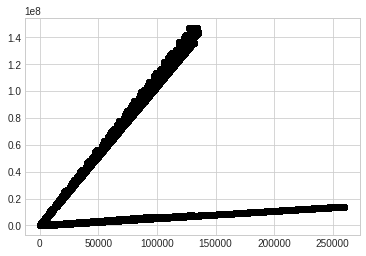

In [26]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

x_x = final_df['pktcount']
y_y = final_df['bytecount']

plt.plot(x_x, y_y, 'o', color='black');

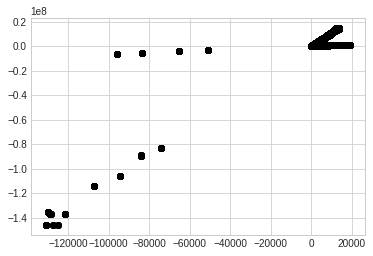

In [20]:
x_x = final_df['pktperflow']
y_y = final_df['byteperflow']

plt.plot(x_x, y_y, 'o', color='black')

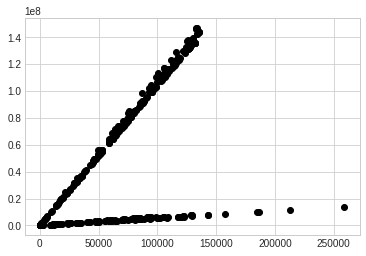

In [25]:
sf = final_df.sample(n = 500)

x_x = sf['pktcount']
y_y = sf['bytecount']

plt.plot(x_x, y_y, 'o', color='black');

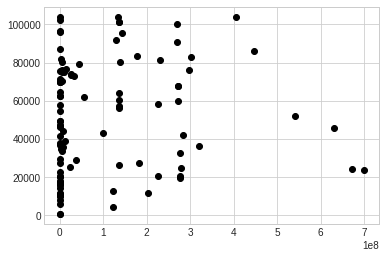

In [24]:
x_x_x = sf['rx_bytes']
y_y_y = sf['row_num']
plt.plot(x_x_x,y_y_y,'o', color='black')
plt.show()

In [25]:
print(final_df.groupby(['label']).size())

label
0    63561
1    40784
dtype: int64
